Marcos Gonzalez  
Homework #19  
4/19/21

# Homework 19

The Federal Reserve Bank of New York has information about the labor market for recent college graduates [here](https://www.newyorkfed.org/research/college-labor-market/college-labor-market_compare-majors.html).

The data in this table can be downloaded as an Excel file at the bottom of the page. If you open this file in Excel, you can save the last table as a CSV file. 

Alternatively, download the data as a CSV file from [https://raw.githubusercontent.com/megan-owen/MAT328-Techniques_in_Data_Science/main/data/labor-market-Feb2021.csv](https://raw.githubusercontent.com/megan-owen/MAT328-Techniques_in_Data_Science/main/data/labor-market-Feb2021.csv).

### Question 1: Load and clean the data

This data file requires some cleaning.  Open the CSV file in Jupyter or another text editor to see what the possible problems are, and refer to Lab 4 for how to fix them. 

In [1]:
import seaborn as sns
import pandas as pd

from sklearn.preprocessing import MinMaxScaler

from sklearn.cluster import KMeans

from sklearn.metrics import confusion_matrix

%matplotlib inline

In [2]:
labor = pd.read_csv("labor.csv", skiprows = 13, skipfooter = 2, sep = ",")
labor

<ipython-input-2-2b40e5d4ee0c>:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support skipfooter; you can avoid this warning by specifying engine='python'.
  labor = pd.read_csv("labor.csv", skiprows = 13, skipfooter = 2, sep = ",")


,Major,Unemployment Rate,Underemployment Rate,Median Wage Early Career,Median Wage Mid-Career,Share with Graduate Degree
0,Agriculture,3.0,60.3,"40,000","65,000",20.8
1,Animal and Plant Sciences,2.6,58.6,"37,000","63,000",35.1
2,Environmental Studies,3.9,53.7,"39,000","65,000",30.5
3,Architecture,2.2,27.9,"50,000","76,000",41.0
4,Ethnic Studies,5.1,51.9,"40,000","67,000",48.6
...,...,...,...,...,...,...
69,International Affairs,4.1,53.1,"46,150","79,000",43.0
70,History,5.5,53.6,"40,000","64,000",49.5
71,Engineering Technologies,3.1,45.7,"50,000","85,000",24.9
72,Miscellaneous Technologies,3.2,52.2,"45,000","80,000",19.0


In [3]:
labor["Median Wage Early Career"] = labor["Median Wage Early Career"].str.replace(",","")
labor["Median Wage Mid-Career"] = labor["Median Wage Mid-Career"].str.replace(",","")
labor

,Major,Unemployment Rate,Underemployment Rate,Median Wage Early Career,Median Wage Mid-Career,Share with Graduate Degree
0,Agriculture,3.0,60.3,40000,65000,20.8
1,Animal and Plant Sciences,2.6,58.6,37000,63000,35.1
2,Environmental Studies,3.9,53.7,39000,65000,30.5
3,Architecture,2.2,27.9,50000,76000,41.0
4,Ethnic Studies,5.1,51.9,40000,67000,48.6
...,...,...,...,...,...,...
69,International Affairs,4.1,53.1,46150,79000,43.0
70,History,5.5,53.6,40000,64000,49.5
71,Engineering Technologies,3.1,45.7,50000,85000,24.9
72,Miscellaneous Technologies,3.2,52.2,45000,80000,19.0


In [4]:
labor["Median Wage Early Career"] = labor["Median Wage Early Career"].astype(int)
labor["Median Wage Mid-Career"] = labor["Median Wage Mid-Career"].astype(int)
labor.dtypes

Major                          object
Unemployment Rate             float64
Underemployment Rate          float64
Median Wage Early Career        int64
Median Wage Mid-Career          int64
Share with Graduate Degree    float64
dtype: object

In [5]:
labor

,Major,Unemployment Rate,Underemployment Rate,Median Wage Early Career,Median Wage Mid-Career,Share with Graduate Degree
0,Agriculture,3.0,60.3,40000,65000,20.8
1,Animal and Plant Sciences,2.6,58.6,37000,63000,35.1
2,Environmental Studies,3.9,53.7,39000,65000,30.5
3,Architecture,2.2,27.9,50000,76000,41.0
4,Ethnic Studies,5.1,51.9,40000,67000,48.6
...,...,...,...,...,...,...
69,International Affairs,4.1,53.1,46150,79000,43.0
70,History,5.5,53.6,40000,64000,49.5
71,Engineering Technologies,3.1,45.7,50000,85000,24.9
72,Miscellaneous Technologies,3.2,52.2,45000,80000,19.0


### Question 2: K-Means Clustering (unscaled)

a) Create a DataFrame x with the 5 quantitative columns (Unemployment Rate,Underemployment Rate,Median Wage Early Career,Median Wage Mid-Career,Share with Graduate Degree).

In [6]:
x = labor[["Unemployment Rate", "Underemployment Rate", "Median Wage Early Career", "Median Wage Mid-Career", "Share with Graduate Degree"]]
x.head()

,Unemployment Rate,Underemployment Rate,Median Wage Early Career,Median Wage Mid-Career,Share with Graduate Degree
0,3.0,60.3,40000,65000,20.8
1,2.6,58.6,37000,63000,35.1
2,3.9,53.7,39000,65000,30.5
3,2.2,27.9,50000,76000,41.0
4,5.1,51.9,40000,67000,48.6


2b) Use the K-Means clustering algorithm to group the data into 4 groups.

In [7]:
kmeans = KMeans(n_clusters=4)

In [8]:
kmeans.fit(x)

KMeans(n_clusters=4)

In [9]:
clusters = kmeans.predict(x)

2c) Add a column with the assigned clusters to your original DataFrame, and plot the scatterplots of all pairs of quantitative variables, colored by the clusters.  How well do you think the clustering worked?

In [20]:
labor["clusters"] = clusters
labor

,Major,Unemployment Rate,Underemployment Rate,Median Wage Early Career,Median Wage Mid-Career,Share with Graduate Degree,clusters,clusters_scaled
0,Agriculture,3.0,60.3,40000,65000,20.8,3,0
1,Animal and Plant Sciences,2.6,58.6,37000,63000,35.1,3,0
2,Environmental Studies,3.9,53.7,39000,65000,30.5,3,0
3,Architecture,2.2,27.9,50000,76000,41.0,0,3
4,Ethnic Studies,5.1,51.9,40000,67000,48.6,3,1
...,...,...,...,...,...,...,...,...
69,International Affairs,4.1,53.1,46150,79000,43.0,0,1
70,History,5.5,53.6,40000,64000,49.5,3,1
71,Engineering Technologies,3.1,45.7,50000,85000,24.9,0,0
72,Miscellaneous Technologies,3.2,52.2,45000,80000,19.0,0,0


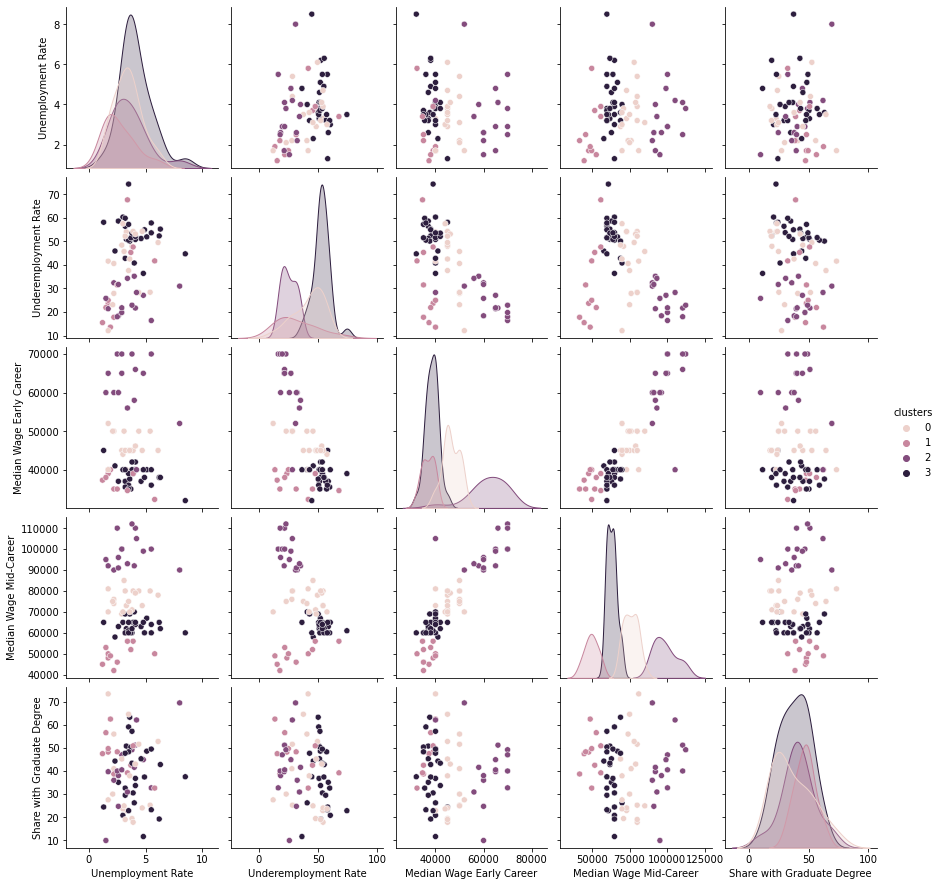

In [11]:
sns.pairplot(labor, hue = "clusters")

2d) Look at your DataFrame to see which majors have been grouped into which cluster.  Do these groupings make sense?  Why or why not? 

It seems to be grouping the data by the Median Wage Mid-Career. The higher values are 0 and the lower values are 3. It kinda makes sense since the degrees related to technology are at 0.

### Question 3: K-Means Clustering (scaled)

a) Create a DataFrame `x_scaled` with the 5 quantitative columns (Unemployment Rate,Underemployment Rate,Median Wage Early Career,Median Wage Mid-Career,Share with Graduate Degree) scaled to be between 0 and 1.

In [13]:
scaler = MinMaxScaler()

In [14]:
x_scaled = scaler.fit_transform(x)
x_scaled

array([[0.24657534, 0.77491961, 0.21052632, 0.32857143, 0.17165354],
       [0.19178082, 0.74758842, 0.13157895, 0.3       , 0.39685039],
       [0.36986301, 0.66881029, 0.18421053, 0.32857143, 0.32440945],
       [0.1369863 , 0.25401929, 0.47368421, 0.48571429, 0.48976378],
       [0.53424658, 0.63987138, 0.21052632, 0.35714286, 0.60944882],
       [0.28767123, 0.67363344, 0.21052632, 0.44285714, 0.20472441],
       [0.38356164, 0.46141479, 0.21052632, 0.4       , 0.25669291],
       [0.68493151, 0.64630225, 0.15789474, 0.32857143, 0.14645669],
       [0.35616438, 0.5755627 , 0.34210526, 0.41428571, 0.1496063 ],
       [0.57534247, 0.26205788, 0.47368421, 0.54285714, 0.24094488],
       [0.5890411 , 0.06913183, 1.        , 0.82857143, 0.35905512],
       [0.06849315, 0.18649518, 0.18421053, 0.08571429, 0.60314961],
       [0.1369863 , 0.09163987, 0.07894737, 0.        , 0.45354331],
       [0.        , 0.05466238, 0.13947368, 0.04285714, 0.59212598],
       [0.06849315, 0.2073955 , 0.

3b) Use the K-Means clustering algorithm to group the scaled data into 4 groups.

In [15]:
kmeans_scaled = KMeans(n_clusters = 4)
kmeans_scaled.fit(x_scaled)

KMeans(n_clusters=4)

3c) Add a column with the assigned clusters from 3b to your original DataFrame, and plot the scatterplots of all pairs of quantitative variables, colored by these clusters.  How well do you think the clustering of scaled data worked?

In [16]:
clusters_scaled = kmeans_scaled.predict(x_scaled)
clusters_scaled

array([0, 0, 0, 3, 1, 0, 0, 0, 0, 0, 2, 3, 3, 3, 3, 3, 3, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 3, 1, 2, 0, 1, 0, 0, 2, 1, 0, 0, 0, 1, 0, 3, 1, 1, 0, 3, 0,
       2, 0, 2, 1, 1, 0, 0, 1], dtype=int32)

In [17]:
labor["clusters_scaled"] = clusters_scaled
labor

,Major,Unemployment Rate,Underemployment Rate,Median Wage Early Career,Median Wage Mid-Career,Share with Graduate Degree,clusters,clusters_scaled
0,Agriculture,3.0,60.3,40000,65000,20.8,3,0
1,Animal and Plant Sciences,2.6,58.6,37000,63000,35.1,3,0
2,Environmental Studies,3.9,53.7,39000,65000,30.5,3,0
3,Architecture,2.2,27.9,50000,76000,41.0,0,3
4,Ethnic Studies,5.1,51.9,40000,67000,48.6,3,1
...,...,...,...,...,...,...,...,...
69,International Affairs,4.1,53.1,46150,79000,43.0,0,1
70,History,5.5,53.6,40000,64000,49.5,3,1
71,Engineering Technologies,3.1,45.7,50000,85000,24.9,0,0
72,Miscellaneous Technologies,3.2,52.2,45000,80000,19.0,0,0


/Users/marcos/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


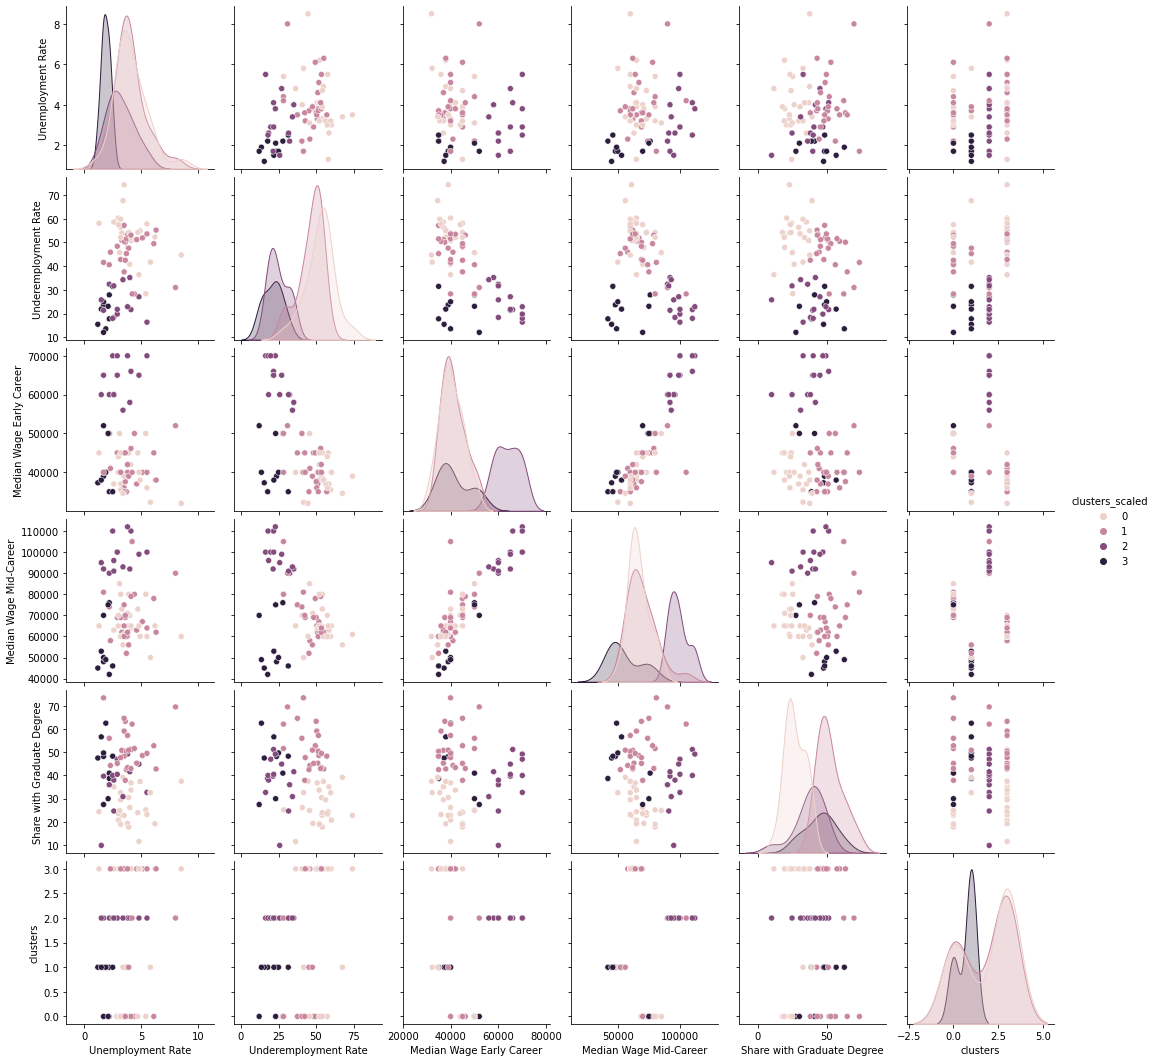

In [18]:
sns.pairplot(labor, hue = "clusters_scaled")

3d) Look at your DataFrame to see which majors have been grouped into which cluster of the scaled data. Do these groupings make sense? Why or why not?

The same thing seems to be going on here with majors related to technology or science are grouped together at 0. Which kinda makes sense that those majors make more money.

3e) Which data gave better clusters: the scaled or unscaled data?  Why?

I'd say that scaled data gives us a better look at how it is spliting the data compared the the normal one.